# Team F

In [1]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [2]:
link = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv"

In [3]:
df = pd.read_csv(link, header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [5]:
#german = pd.read_csv('german.csv', header= None)
#german

In [5]:
df.shape

(1000, 21)

In [12]:
#target has saved the last column of the array
target = df.values[:,-1]

counter = Counter(target)

for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%


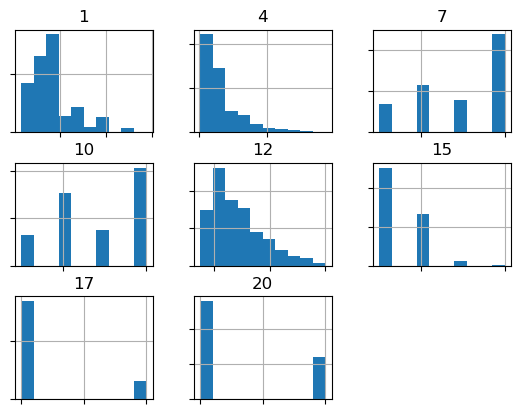

In [15]:
#num_ix includes the columns that are of int64/float64 type
num_ix = df.select_dtypes(include=['int64', 'float64']).columns

# select a subset of the dataframe with the chosen columns
subset = df[num_ix]

# create a histogram plot of each numeric variable
ax = subset.hist()

# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
pyplot.show()

# Fbeta-measure

In [9]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names


>LDA 0.519 (0.072)
>RandomForest 0.380 (0.092)


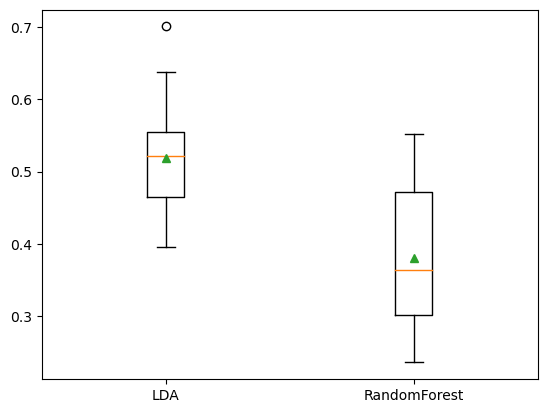

In [10]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Precision

In [12]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(precision_score)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names



>LDA 0.629 (0.078)
>RandomForest 0.635 (0.113)


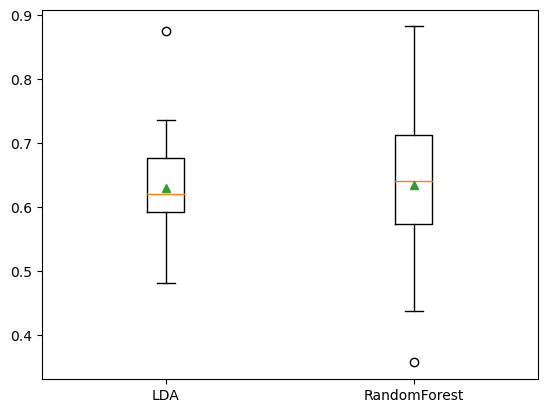

In [13]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Recall

In [14]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(recall_score)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names


>LDA 0.500 (0.081)
>RandomForest 0.333 (0.106)


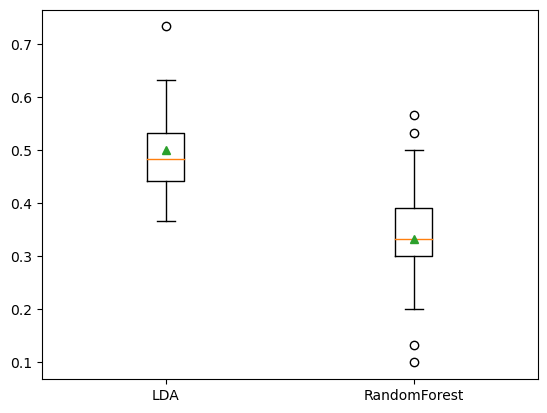

In [15]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# F-measure

In [16]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(f1_score)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names

>LDA 0.553 (0.061)
>RandomForest 0.416 (0.111)


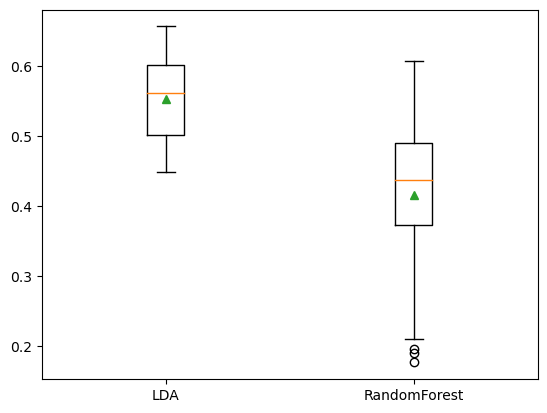

In [17]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Accuracy

In [20]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(accuracy_score)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names

>LDA 0.759 (0.031)
>RandomForest 0.736 (0.024)


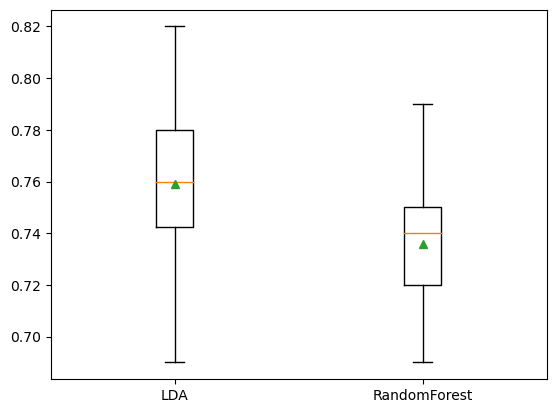

In [21]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# ROC

In [22]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(roc_auc_score)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names

>LDA 0.685 (0.039)
>RandomForest 0.633 (0.045)


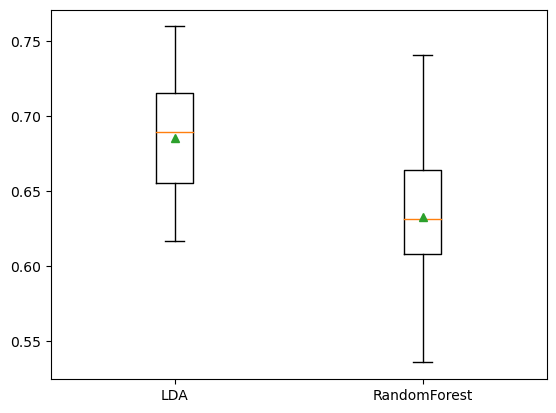

In [23]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#  Brier Score

In [24]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(brier_score_loss)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names

>LDA 0.241 (0.031)
>RandomForest 0.258 (0.033)


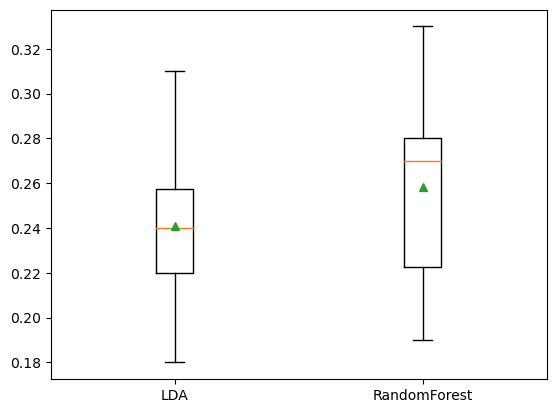

In [25]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Log Loss

In [27]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


def evaluate_model(X, y, model):

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(log_loss)

    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    
    return scores

# define models to test
def get_models():
    
    models, names = list(), list()
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # Random-Forest Classification
    models.append(RandomForestClassifier(n_estimators=10))
    names.append('RandomForest')
    return models, names

>LDA 8.324 (1.083)
>RandomForest 9.268 (1.085)


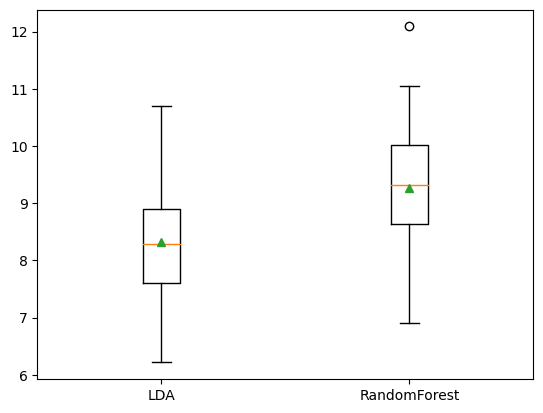

In [28]:
full_path = 'german.csv'

X, y, cat_ix, num_ix = load_dataset(full_path)

models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])

    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()